In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

from sklearn.cluster import DBSCAN

sys.path.append("C:\\Users\\Sam Yu\\Documents\\GitHub\\LiquidCrystals\\src")

In [82]:
from matplotlib.cm import get_cmap

In [2]:
from visualizations import plot_single_state
from features import retrieve_system_data

In [3]:
data_path = "C:\\Users\\Sam Yu\\Desktop\\School\\4B\\Phys_437B_RP\\datasets\\r=0.4R\\3_30_2022\\R_22_N_200_STEPS_2000000_A_0.25_K_20_L_0.4_TARGET_0.325"
lc_sys = retrieve_system_data(run_path=data_path)

In [4]:
R = lc_sys.outer_radius
r = lc_sys.inner_radius
n = lc_sys.num_of_particles
a = lc_sys.minor_axis
b = lc_sys.major_axis

print(b)

3.6349965612088275


In [5]:
step = 1755000
pos_array_three_fold = lc_sys.states[step]
print(pos_array_three_fold.shape)

(190, 3)


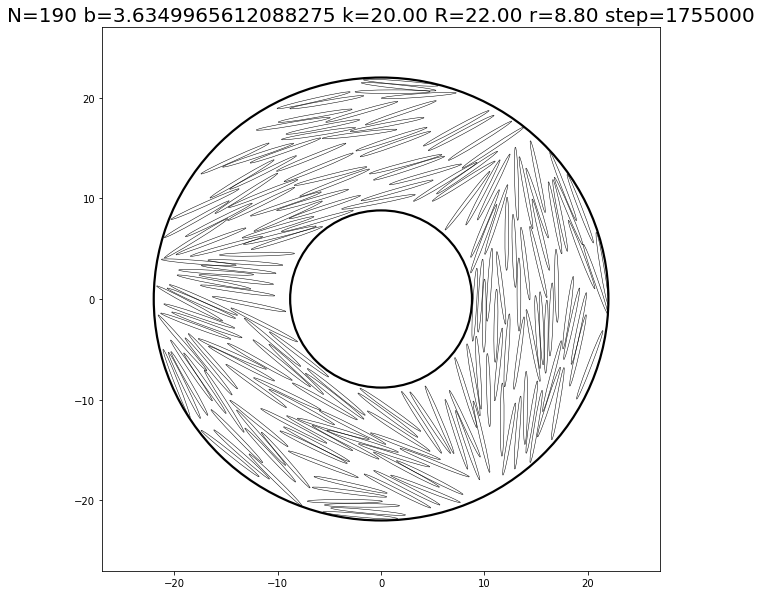

In [6]:
pos_fig = plot_single_state(pos_array_three_fold, step, n, R, r, a, b, color_angles=False)

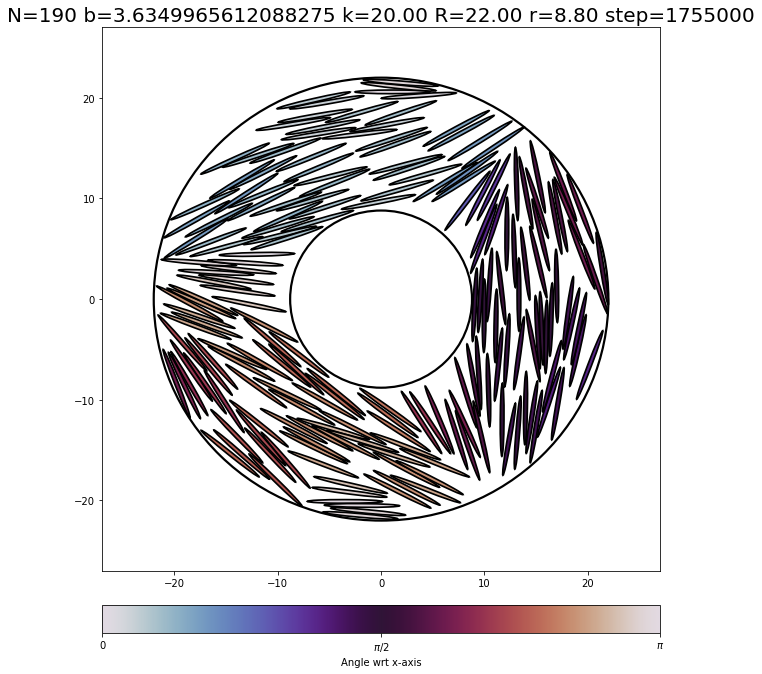

In [7]:
pos_fig = plot_single_state(pos_array_three_fold, step, n, R, r, a, b, color_angles=True)
pos_fig.set_size_inches(10, 12.5)

(array([ 2.,  0.,  1.,  1.,  0.,  5.,  2.,  2.,  5.,  4.,  7.,  3.,  4.,
         3.,  1.,  3.,  2.,  3.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  2.,
         0.,  2.,  0.,  1.,  3.,  3.,  3.,  1.,  3.,  2.,  7.,  4.,  3.,
         1.,  2.,  0.,  5.,  2.,  3.,  0.,  3.,  2.,  4.,  2.,  1.,  1.,
         0.,  1.,  2.,  2.,  1.,  0.,  1.,  4.,  1.,  2.,  1.,  1.,  2.,
         5.,  2.,  1.,  1.,  0.,  3., 12.,  2.,  3.,  2.,  4.,  2.,  2.,
         0.,  1.,  1.,  1.,  2.,  3.,  5.,  1.,  2.]),
 array([1.9061565e-03, 3.3288989e-02, 6.4671822e-02, 9.6054651e-02,
        1.2743749e-01, 1.5882032e-01, 1.9020315e-01, 2.2158599e-01,
        2.5296882e-01, 2.8435165e-01, 3.1573448e-01, 3.4711730e-01,
        3.7850013e-01, 4.0988299e-01, 4.4126582e-01, 4.7264865e-01,
        5.0403148e-01, 5.3541434e-01, 5.6679714e-01, 5.9818000e-01,
        6.2956280e-01, 6.6094565e-01, 6.9232845e-01, 7.2371131e-01,
        7.5509411e-01, 7.8

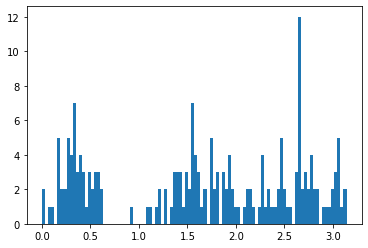

In [8]:
angles = pos_array_three_fold[:, -1] % np.pi
plt.hist(angles, bins=100)

In [9]:
print(pos_array_three_fold.shape)

(190, 3)


(-2.634996561208828, 6.634996561208828)

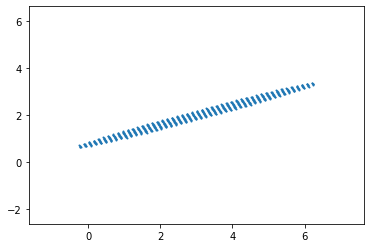

In [63]:
# random points inside ellipse
num_points_x = 50
num_points_y = 20
x = np.linspace(-b, b, num_points_x)
y = np.linspace(-a, a, num_points_y)
xv, yv = np.meshgrid(x, y)

x_ellipse = xv[(a * xv) ** 2 + (b * yv) ** 2 <= (a * b) ** 2]
y_ellipse = yv[(a * xv) ** 2 + (b * yv) ** 2 <= (a * b) ** 2]
xye = np.vstack((x_ellipse, y_ellipse))

#plt.scatter(x_ellipse, y_ellipse, s=1)

theta = np.pi / 8
rot = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

xye_new = rot.dot(xye)
x_shift = 3
y_shift = 2
xye_new[0, :] = xye_new[0, :] + x_shift
xye_new[1, :] = xye_new[1, :] + y_shift
plt.scatter(xye_new[0, :], xye_new[1, :], s=1)
    
plt.xlim([-(b+1) + x_shift, b + 1 + x_shift])
plt.ylim([-(b+1) + y_shift, b + 1 + y_shift])

(128,)
(128,)


In [79]:
# sample onto an ellispe via rejection sampling
def scatter_onto_ellipse(s_minor, s_major, o_angle, x_shift, y_shift):
    #sample along x and y
    num_points_x = 20
    num_points_y = 20
    x = np.linspace(-s_major, s_major, num_points_x)
    y = np.linspace(-s_minor, s_minor, num_points_y)
    xv, yv = np.meshgrid(x, y)
    
    # reject points that don't fall within untransformed the ellipse
    access_array = (s_minor * xv) ** 2 + (s_major * yv) ** 2 <= (s_minor * s_major) ** 2
    x_ellipse = xv[access_array]
    y_ellipse = yv[access_array]
    
    # now transform the ellipse points
    rot = np.array([[np.cos(o_angle), -np.sin(o_angle)], [np.sin(o_angle), np.cos(o_angle)]]) # rotation matrix
    xy_rot = rot.dot(np.vstack((x_ellipse, y_ellipse))) # apply rotation
    xy_rot[0, :] = xy_rot[0, :] + x_shift # apply x-shift
    xy_rot[1, :] = xy_rot[1, :] + y_shift # apply y-shift
    
    return xy_rot

(276,)
(276,)
(2, 276)


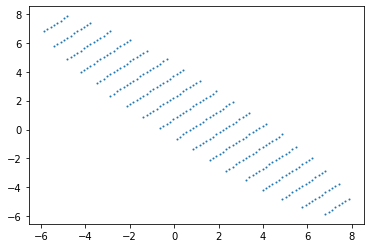

In [76]:
xys = scatter_onto_ellipse(10, 2, o_angle=np.pi/4, x_shift=1, y_shift=1)
plt.scatter(xys[0, :], xys[1, :], s=1)

(190, 3)
(52440, 2)


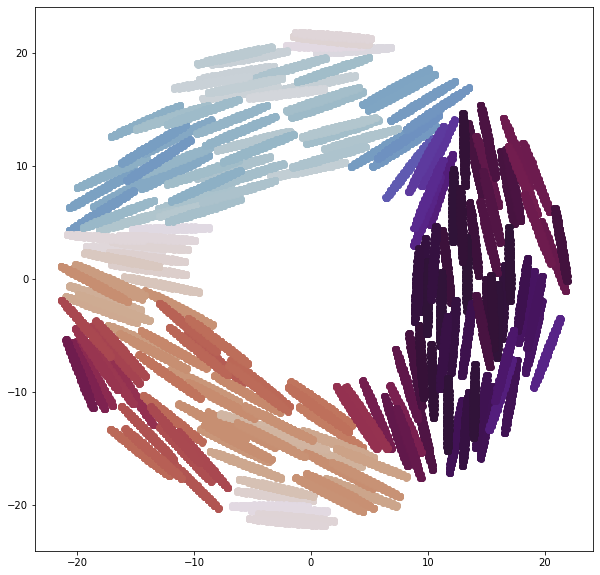

In [87]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

color_map = get_cmap("twilight")

master_array = []
for x, y, theta in pos_array_three_fold:
    xys = scatter_onto_ellipse(a, b, theta, x, y)
    master_array.append(xys)
    fill_color = color_map((theta % np.pi) / np.pi)
    plt.scatter(xys[0, :], xys[1, :], color=fill_color)
    
master_array = np.hstack(master_array)
print(pos_array_three_fold.shape)
print(master_array.T.shape)

(190, 3)
Estimated number of clusters: 5
Estimated number of noise points: 15


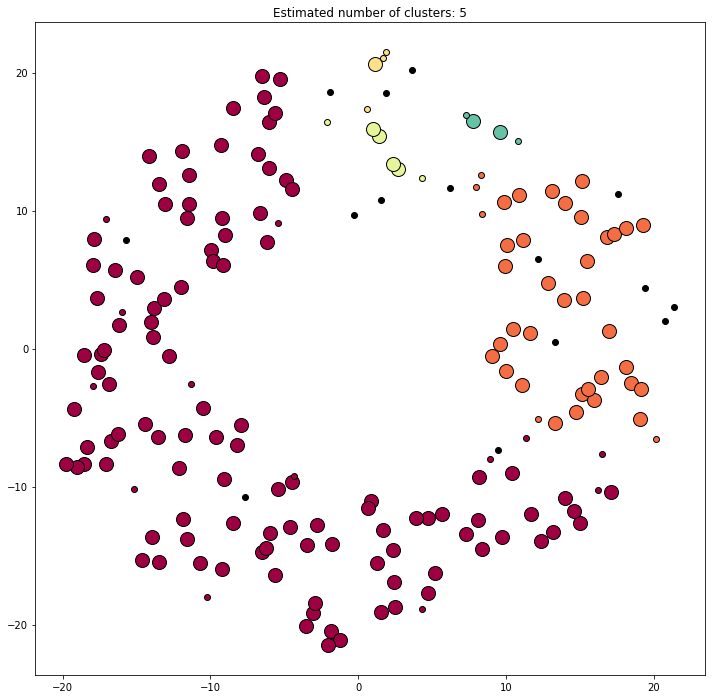

In [94]:
# try to use clustering in order to find rotational phase
X = pos_array_three_fold
# X = master_array.T
#orients = pos_array_three_fold[:, -1] % np.pi
#o_to_euclidean = np.column_stack((np.cos(orients), np.sin(orients)))
#X = np.column_stack((pos_array_three_fold[:, :2], o_to_euclidean))
print(X.shape)

def distance_func(x, y):
    return (np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)) + 2 * np.sin(x[2]-y[2])**2

# compute DBSCAN
db = DBSCAN(eps=3.5, min_samples=4).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if 1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

############################################################################
# Plot the results
plt.figure(figsize=(12, 12))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

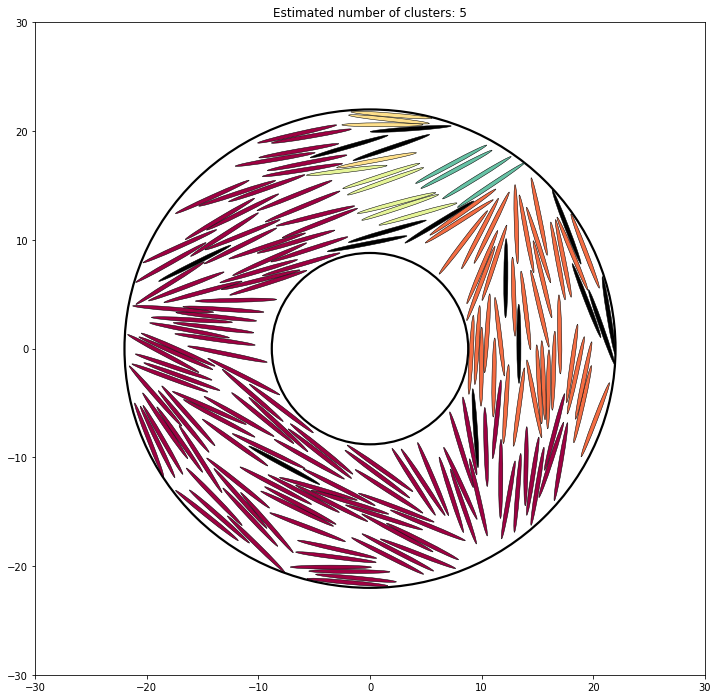

In [95]:
from matplotlib.patches import Ellipse

############################################################################
# Plot the results
fig, ax = plt.subplots()

fig.set_size_inches(12, 12)

outer_circle = plt.Circle((0, 0), R, color="black", fill=False, linewidth=2.2)
inner_circle = plt.Circle((0, 0), r, color="black", fill=False, linewidth=2.2)
ax.add_patch(inner_circle)
ax.add_patch(outer_circle)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = pos_array_three_fold[class_member_mask]
    for pos in xy:
        ellipse_angle = (180 / np.pi) * (pos[-1] % np.pi)
        particle = Ellipse(xy=pos[:-1], angle=ellipse_angle,
                   width=2 * b, height=2 * a,
                   linewidth=0.5, ec='black', fc=col)
        ax.add_patch(particle)

# x,y-axis limits
circle_pad = 5
ax.set_xlim(-25 - circle_pad, 25 + circle_pad)
ax.set_ylim(-25 - circle_pad, 25 + circle_pad)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

(-27.0, 27.0)

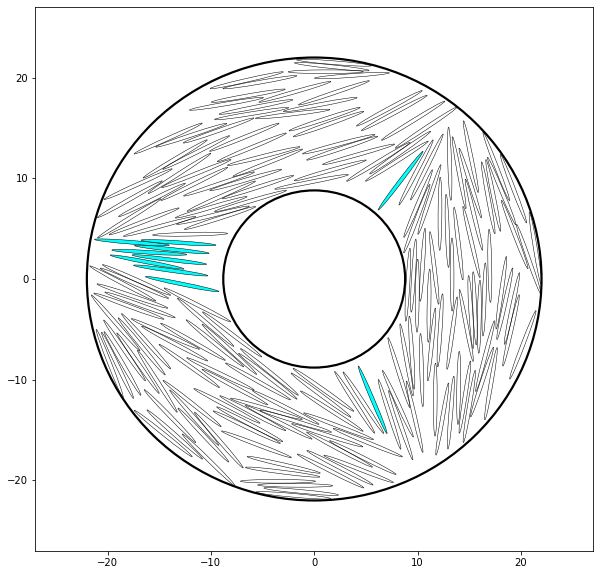

In [126]:
from interactions import compute_ellipse_line_intersection

'''
for pos in pos_array:
    ellipse_angle = (180 / np.pi) * (pos[-1] % np.pi)
    if color_angles:
        fill_color = color_map(ellipse_angle / 180)
        particle = Ellipse(xy=pos[:-1], angle=ellipse_angle,
                           width=2 * b, height=2 * a, ec="black",
                           linewidth=1.7, fc=fill_color, fill=True)
        p.append(particle)
        colors.append(fill_color)
    else:
        particle = Ellipse(xy=pos[:-1], angle=ellipse_angle,
                           width=2 * b, height=2 * a,
                           linewidth=0.5, color='black', fill=False)
    ax.add_patch(particle)
'''

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

outer_circle = plt.Circle((0, 0), R, color="black", fill=False, linewidth=2.2)
inner_circle = plt.Circle((0, 0), r, color="black", fill=False, linewidth=2.2)
ax.add_patch(inner_circle)
ax.add_patch(outer_circle)
    
for pos in pos_array_three_fold:
    x = pos[0]
    y = pos[1]
    theta = pos[2]
    
    ellipse_angle = (180 / np.pi) * (theta % np.pi)
    
    condition = compute_ellipse_line_intersection(theta, x, y, a, b, k=0, d=0)
    if condition:
        particle = Ellipse(xy=(x,y), angle=ellipse_angle, width=2 * b, height=2 * a,
                           linewidth=0.5, ec='black', color='cyan', fill=True)
    else:
        particle = Ellipse(xy=(x,y), angle=ellipse_angle, width=2 * b, height=2 * a,
                           linewidth=0.5, ec='black', fill=False)
    ax.add_patch(particle)

plt.plot()
circle_pad = 5
ax.set_xlim(-R - circle_pad, R + circle_pad)
ax.set_ylim(-R - circle_pad, R + circle_pad)

In [136]:
compute_ellipse_line_intersection(theta=np.pi / 2, x_c=15, y_c=0, a=b, b=a, k=0, d=0)

False

In [ ]:
def plot_single_state(pos_array, mc_step, N, R, r, a, b, color_angles=False):

    fig, ax = plt.subplots()

    if color_angles:
        fig.set_size_inches(10, 12)
    else:
        fig.set_size_inches(10, 10)

    outer_circle = plt.Circle((0, 0), R, color="black", fill=False, linewidth=2.2)
    inner_circle = plt.Circle((0, 0), r, color="black", fill=False, linewidth=2.2)
    ax.add_patch(inner_circle)
    ax.add_patch(outer_circle)

    # color map
    color_map = get_cmap("twilight")

    p = []
    colors = []

    # add ellipses to figure
    for pos in pos_array:
        ellipse_angle = (180 / np.pi) * (pos[-1] % np.pi)
        if color_angles:
            fill_color = color_map(ellipse_angle / 180)
            particle = Ellipse(xy=pos[:-1], angle=ellipse_angle,
                               width=2 * b, height=2 * a, ec="black",
                               linewidth=1.7, fc=fill_color, fill=True)
            p.append(particle)
            colors.append(fill_color)
        else:
            particle = Ellipse(xy=pos[:-1], angle=ellipse_angle,
                               width=2 * b, height=2 * a,
                               linewidth=0.5, color='black', fill=False)
        ax.add_patch(particle)

    if color_angles:
        e = PatchCollection(p, cmap=color_map)
        e.set_array(colors)
        e.set_clim([0, np.pi])
        cbar = fig.colorbar(e, label="Angle wrt x-axis",
                            orientation="horizontal", ax=plt.gca(), pad=0.05)
        cbar.set_ticks([0, np.pi/2, np.pi])
        cbar.set_ticklabels(["0", r"$\pi/2$", r"$\pi$"])

    # x,y-axis limits
    circle_pad = 5
    ax.set_xlim(-R - circle_pad, R + circle_pad)
    ax.set_ylim(-R - circle_pad, R + circle_pad)
    ax.set_title(f"N={N:} b={b} k={b / a:.2f} R={R:.2f} r={r:.2f} "
                 f"step={mc_step}", size=20)

    return fig